In [42]:
import sys, time, argparse, re, gensim, math
import pandas as pd
from tqdm import tqdm
import pickle as pkl
import numpy as np
import faulthandler
import logging
from os.path import existsread_file('../data/1700/1700_all_top_descriptors_500.pickle')
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
import matplotlib.pyplot as plt

In [49]:
def read_file(input_path):
    logging.info('Opened: ' + input_path)
    with open(input_path, "rb") as f:
        input_obj = pkl.load(f)
        return input_obj

In [50]:
df_1700 = read_file('../data/1700/1700_all_top_descriptors_500.pickle').reset_index(drop=True)
df_1800 = read_file('../data/1800/1800_all_top_descriptors_500.pickle').reset_index(drop=True)
df_1900 = read_file('../data/1900/1900_all_top_descriptors_500.pickle').reset_index(drop=True)

In [51]:
df_1700['literary_period'] = '1700'
df_1800['literary_period'] = '1800'
df_1900['literary_period'] = '1900'

In [52]:
combined_periods = pd.concat([df_1700, df_1800])
combined_periods = pd.concat([combined_periods, df_1900])

In [53]:
sight_df = combined_periods.loc[combined_periods['modality'] == 'sight']
hear_df = combined_periods.loc[combined_periods['modality'] == 'hear']
touch_df = combined_periods.loc[combined_periods['modality'] == 'touch']
taste_df = combined_periods.loc[combined_periods['modality'] == 'taste']
smell_df = combined_periods.loc[combined_periods['modality'] == 'smell']

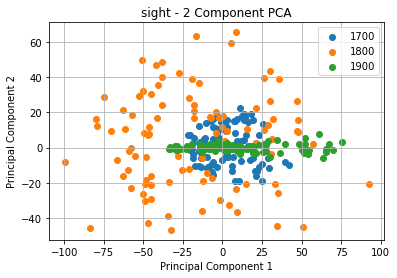

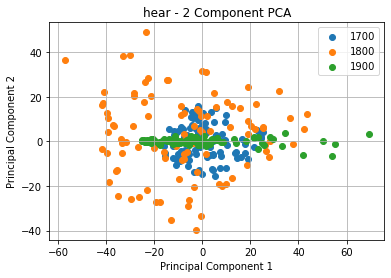

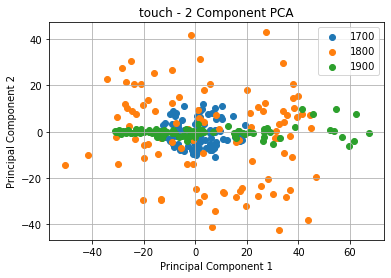

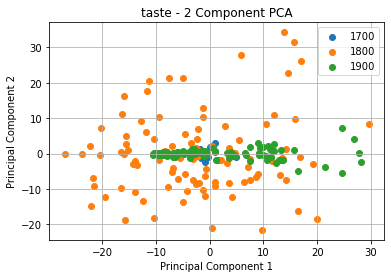

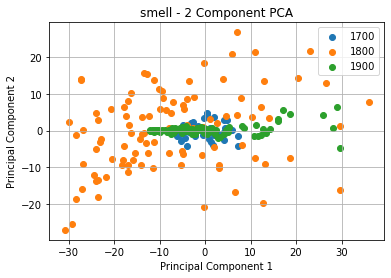

In [54]:
modality_dict = {'sight': sight_df, 'hear': hear_df, 'touch': touch_df, 'taste': taste_df, 'smell': smell_df}
k = 2

for modality, df in modality_dict.items():
    fig = px.scatter(
                df,
                color=df["literary_period"],
                color_discrete_map={'1700': '#1f77b4', '1800': '#2ca02c', '1900': '#d62728'},
                x=df['Principal Component 1'],
                y=df['Principal Component 2'],
                hover_data=df.columns[:-1 * k],
                custom_data=df.columns[:-1 * k],
                title= modality + " - " + str(k) + " Component PCA")
    fig.update_traces(marker=dict(size=12,))
    fig.write_html('../visuals/' + modality + '_pca_plot.html')
    fig.show()

    fig, ax = plt.subplots()
    for i,d in df.groupby('literary_period'):
        ax.scatter(d['Principal Component 1'], d['Principal Component 2'], label=i)
    plt.title(modality + " - " + str(k) + " Component PCA")
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc="upper right")
    plt.grid(True)
    plt.savefig('../visuals/' + modality + '_pca_plot.pdf')